# Importing libraries, data & mounting drive

In [1]:
# Performing linear regression on a dataset with transformed features
# Created by Sebastian Bommer 2020-05-17
# Modified by Sebastian Bommer 2021-03-28

Ridge regression:
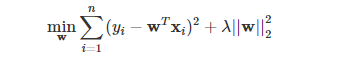



In [2]:
# importing libraries
import pandas as pd
import sklearn
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# # mounting google drive for use with google collab
# from google.colab import drive
# drive.mount('/content/drive')

In [4]:
# loading data
path = r'.\data\train.csv'

D = pd.read_csv(path, index_col='Id')
print(f'\n Data: \n {D}')

X_df = D.iloc[:,1::]
y_df = D.iloc[:,0]

X = np.array(X_df)
y = np.array(y_df)


 Data: 
             y    x1    x2    x3    x4    x5
Id                                         
0   -6.822679  0.02  0.05 -0.09 -0.43 -0.08
1   -6.326290 -0.13  0.11 -0.08 -0.29 -0.03
2   -9.302728  0.08  0.06 -0.07 -0.41 -0.03
3   -7.371893  0.02 -0.12  0.01 -0.43 -0.02
4   -6.027647 -0.14 -0.12 -0.08 -0.02 -0.08
..        ...   ...   ...   ...   ...   ...
695 -6.147394  0.31 -0.09  0.04 -0.09  0.03
696 -6.214899 -0.26 -0.01  0.02 -0.40  0.05
697 -6.841341 -0.27 -0.22 -0.01 -0.32 -0.05
698 -6.523371  0.19  0.11 -0.05 -0.27 -0.04
699 -5.676683 -0.09 -0.09 -0.06 -0.41 -0.06

[700 rows x 6 columns]


# Extending X with feature transformation

In [5]:
# feature transformation
squared = X_df**2
exponential = np.exp(X_df)
cosine = np.cos(X_df)

# Concatenating transformed features
X_df = pd.concat([X_df, squared, exponential, cosine], axis=1, sort=False)
X_df['const'] = 1  # adding constant term
X_df.columns = ['phi_'+str(i+1) for i in range(21)]

X = np.array(X_df)
X_df

,phi_1,phi_2,phi_3,phi_4,phi_5,phi_6,phi_7,phi_8,phi_9,phi_10,...,phi_12,phi_13,phi_14,phi_15,phi_16,phi_17,phi_18,phi_19,phi_20,phi_21
Id,,,,,,,,,,,,,,,,,,,,,
0,0.02,0.05,-0.09,-0.43,-0.08,0.0004,0.0025,0.0081,0.1849,0.0064,...,1.051271,0.913931,0.650509,0.923116,0.999800,0.998750,0.995953,0.908966,0.996802,1
1,-0.13,0.11,-0.08,-0.29,-0.03,0.0169,0.0121,0.0064,0.0841,0.0009,...,1.116278,0.923116,0.748264,0.970446,0.991562,0.993956,0.996802,0.958244,0.999550,1
2,0.08,0.06,-0.07,-0.41,-0.03,0.0064,0.0036,0.0049,0.1681,0.0009,...,1.061837,0.932394,0.663650,0.970446,0.996802,0.998201,0.997551,0.917121,0.999550,1
3,0.02,-0.12,0.01,-0.43,-0.02,0.0004,0.0144,0.0001,0.1849,0.0004,...,0.886920,1.010050,0.650509,0.980199,0.999800,0.992809,0.999950,0.908966,0.999800,1
4,-0.14,-0.12,-0.08,-0.02,-0.08,0.0196,0.0144,0.0064,0.0004,0.0064,...,0.886920,0.923116,0.980199,0.923116,0.990216,0.992809,0.996802,0.999800,0.996802,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
695,0.31,-0.09,0.04,-0.09,0.03,0.0961,0.0081,0.0016,0.0081,0.0009,...,0.913931,1.040811,0.913931,1.030455,0.952334,0.995953,0.999200,0.995953,0.999550,1
696,-0.26,-0.01,0.02,-0.40,0.05,0.0676,0.0001,0.0004,0.1600,0.0025,...,0.990050,1.020201,0.670320,1.051271,0.966390,0.999950,0.999800,0.921061,0.998750,1
697,-0.27,-0.22,-0.01,-0.32,-0.05,0.0729,0.0484,0.0001,0.1024,0.0025,...,0.802519,0.990050,0.726149,0.951229,0.963771,0.975897,0.999950,0.949235,0.998750,1


# Creating k-fold split

In [6]:
from sklearn.model_selection import KFold

# hyper parameter
n_fold = 10

kf = KFold(n_fold, shuffle=False)

# Train ridge regression

In [7]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

lam = np.logspace(-5,5,11)

RMSE = []
coef = []

# defining model

for a in lam:
    
    clf = Ridge(alpha=a,solver='cholesky',fit_intercept=False,normalize = False)
    
    RMSE_temp = np.empty(n_fold)
    coef_temp = np.empty([n_fold,21])
    counter = 0
    
    for train_index, test_index in kf.split(X):
        # fit model
        model = clf.fit(X[train_index,:],y[train_index])
        # predict y values
        y_pred = model.predict(X[test_index,:])
        # calculate RMSE
        y_true = y[test_index]
        RMSE_temp[counter] = mean_squared_error(y_true,y_pred)**0.5
        coef_temp[counter,:] = model.coef_
        counter += 1
    
    RMSE.append(np.round(np.mean(RMSE_temp),3))
    coef.append(np.round(np.mean(coef_temp,axis=0),3))
    
print(f"RMSE: {RMSE}")

RMSE: [1.972, 1.969, 1.968, 1.967, 1.962, 1.956, 1.953, 1.953, 2.129, 4.316, 6.244]


# Exporting to .csv

The best choice of lambda is 10.0 with RMSE of 1.953.
Chosen coefficients: [ 0.128 -0.296 -0.435  0.219  0.082 -0.147  0.08   0.082 -0.114  0.03
 -0.513 -0.823 -0.963 -0.401 -0.472 -0.493 -0.605 -0.606 -0.51  -0.58
 -0.565]


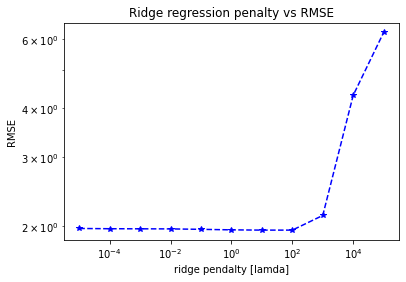

In [8]:
min_idx = RMSE.index(min(RMSE))  # idx with lowest RMSE
coefficients = coef[min_idx]  # listing all coefficients in a matrix

print(f"The best choice of lambda is {lam[min_idx]} with RMSE of {RMSE[min_idx]}.\nChosen coefficients: {coefficients}")

weights = pd.DataFrame(coefficients)  #choosing model with lowest RMSE and averaging it's weights

# create timestamp
import time
tstamp = round(time.time())

# plot lampda vs RMSE
plt.figure
plt.loglog(lam,RMSE,'b*--')
plt.xlabel('ridge pendalty [lamda]')
plt.ylabel('RMSE')
plt.title('Ridge regression penalty vs RMSE')
plt.savefig('.\\plots\\RMSEvsLambda.png',dpi=300)

filePath = f".\\results\\weights_{tstamp}.csv"
weights.to_csv(filePath, index=False, float_format='%.3f',header=False)